### Suppose that I fit a logistic regression model using historical data collected from students
$$\ln\left(\frac{p}{1-p}\right) = -3 + 0.8 \times \text{Hours_Studied} + 1.5 \times \text{Review_Session}$$


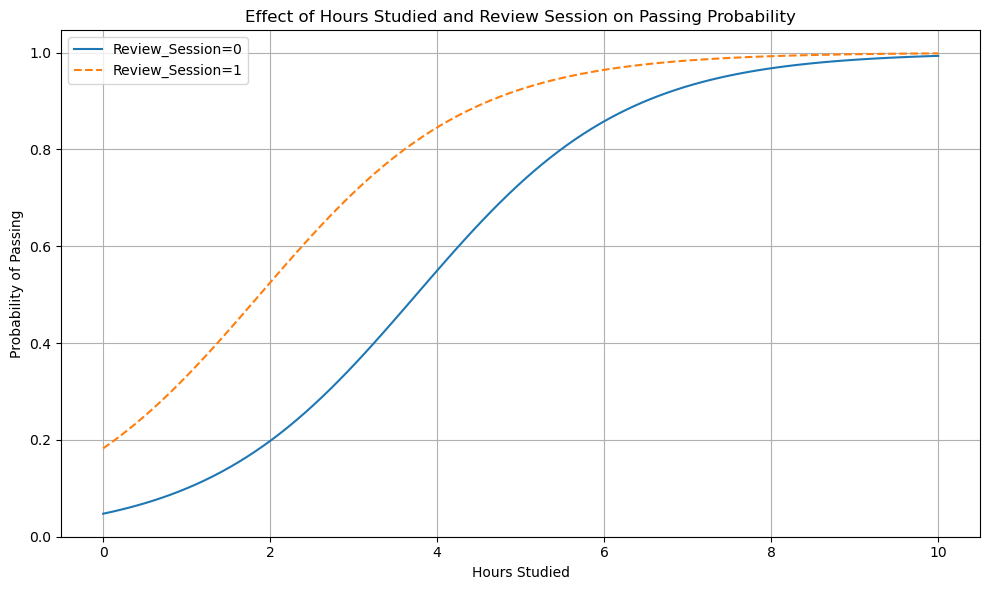

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic function
def logistic_function(z):
    return 1 / (1 + np.exp(-z))

# Define the model
def log_odds(hours_studied, review_session):
    return -3 + 0.8 * hours_studied + 1.5 * review_session

# Generate some data
hours_studied = np.linspace(0, 10, 100)

# Calculate log-odds and probabilities for both Review_Session=0 and Review_Session=1
log_odds_0 = log_odds(hours_studied, 0)
probability_0 = logistic_function(log_odds_0)

log_odds_1 = log_odds(hours_studied, 1)
probability_1 = logistic_function(log_odds_1)

# Plot the data
plt.figure(figsize=(10,6))

plt.plot(hours_studied, probability_0, label='Review_Session=0')
plt.plot(hours_studied, probability_1, label='Review_Session=1', linestyle='--')

plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Effect of Hours Studied and Review Session on Passing Probability')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


C:\Program Files\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


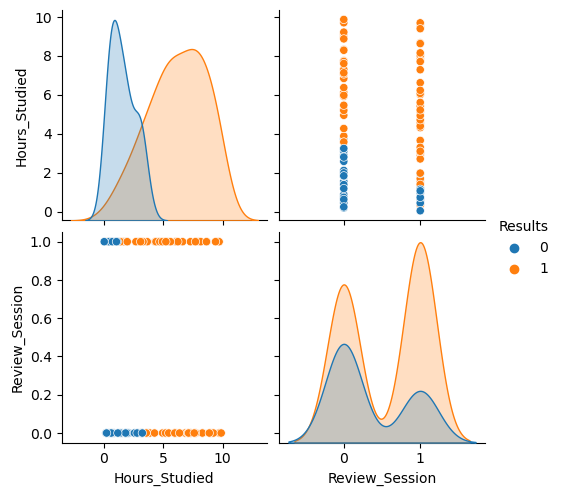

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(r'C:\Users\Preetham Madhamsetty\Desktop\Shalini\IS733\Lab6\student_data.csv')

# Visualize the data
sns.pairplot(data, hue='Results')  # Assuming 'passed' is the target variable
plt.show()


Coefficients: [1.36499215 1.87733756]
Intercept: -4.611824619849803
Accuracy: 0.93
AUC: 0.9761029411764706


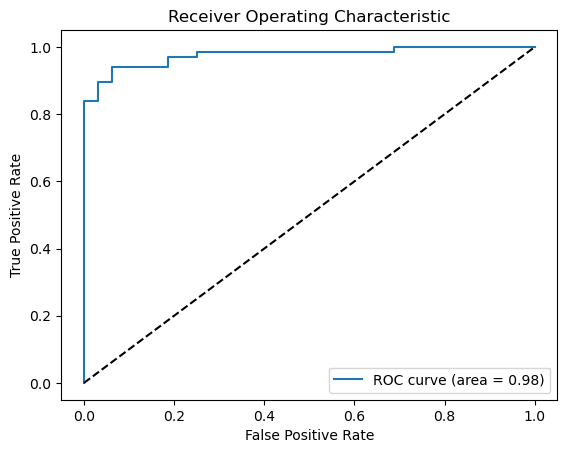

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Define features and target
X = data[['Hours_Studied', 'Review_Session']]  # Features
y = data['Results']  # Target variable

# Fit the model
model = LogisticRegression()
model.fit(X, y)

# Output model coefficients
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# Predictions
y_pred = model.predict(X)
y_prob = model.predict_proba(X)[:, 1]

# Calculate performance metrics
accuracy = accuracy_score(y, y_pred)
auc = roc_auc_score(y, y_prob)

print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("Accuracy:", accuracy)
print("AUC:", auc)

# ROC Curve
fpr, tpr, _ = roc_curve(y, y_prob)
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='best')
plt.show()
